In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"medaminekarmous","key":"1fed91b3195b26f503f988abfab9e6a5"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Creating directory and changing the current working directory
!mkdir cat_dataset
%cd cat_dataset

/content/cat_dataset


In [ ]:
# Searching for dataset
!kaggle datasets list -s catbreed

ref                            title                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------  -------------------  -----  -------------------  -------------  ---------  ---------------  
doctrinek/catbreedsrefined-7k  CatBreedsRefined-7k  442MB  2023-12-07 11:03:49             54          7  0.875            


In [ ]:
!kaggle datasets list -s catspecies

No datasets found


In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download doctrinek/catbreedsrefined-7k
%cd ..

 99% 439M/442M [00:17<00:00, 27.4MB/s]
100% 442M/442M [00:17<00:00, 26.8MB/s]
/content


In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip cat_dataset/catbreedsrefined-7k.zip -d cat_dataset
!rm cat_dataset/catbreedsrefined-7k.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_324.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_325.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_326.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_327.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_328.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_329.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_33.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_330.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_331.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_332.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_333.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_334.jpg  
  inflating: cat_dataset/CatBreedsRefined-v2/Birman/Birman_335.jpg  
  inflating: cat_dataset/C

In [ ]:
# Load images and labels
X = []
y = []

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    img = image.load_img(row['/content/cat_dataset/CatBreedsRefined-v2'], target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values to be between 0 and 1
    X.append(img)
    y.append(row['breed'])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Perform one-hot encoding on the labels
y = label_binarize(y, classes=df['breed'].unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


NameError: ignored

In [ ]:
# Important library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D
from keras.optimizers import Adam

In [ ]:
# Directory containing the dataset
base_dir = "cat_dataset/CatBreedsRefined-v2"

# Dimensions of our images
img_width, img_height = 150, 150

# Set up data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))  # 20 output classes for 20 cat breeds

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Found 5600 images belonging to 20 classes.
Found 1400 images belonging to 20 classes.
Epoch 1/100
175/175 [==============================] - 357s 2s/step - loss: 2.9659 - accuracy: 0.0768 - val_loss: 2.8899 - val_accuracy: 0.1054
Epoch 2/100
175/175 [==============================] - 364s 2s/step - loss: 2.8780 - accuracy: 0.1050 - val_loss: 2.8067 - val_accuracy: 0.1468
Epoch 3/100
 19/175 [==>...........................] - ETA: 5:15 - loss: 2.7970 - accuracy: 0.1382

KeyboardInterrupt: ignored

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers
from keras import models

# Directory containing the dataset
base_dir = "cat_dataset/CatBreedsRefined-v2"

# Dimensions of our images
img_width, img_height = 224, 224  # Adjust according to the input size of MobileNetV2

# Set up data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained MobileNetV2 model (without top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of the pre-trained base
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation='softmax'))  # 20 output classes for 20 cat breeds

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Found 5600 images belonging to 20 classes.
Found 1400 images belonging to 20 classes.
9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/20
175/175 [==============================] - 448s 3s/step - loss: 1.8760 - accuracy: 0.4112 - val_loss: 1.3409 - val_accuracy: 0.5974
Epoch 2/20
175/175 [==============================] - 421s 2s/step - loss: 1.2747 - accuracy: 0.5857 - val_loss: 1.1877 - val_accuracy: 0.6330
Epoch 3/20
175/175 [==============================] - 435s 2s/step - loss: 1.1441 - accuracy: 0.6282 - val_loss: 1.1430 - val_accuracy: 0.6490
Epoch 4/20
175/175 [==============================] - 494s 3s/step - loss: 1.0408 - accuracy: 0.6639 - val_loss: 1.1165 - val_accuracy: 0.6504
Epoch 5/20
175/175 [==============================] - 436s 2s/step - loss: 0.9867 - accuracy: 0.6654 - val_loss: 1.1069 - val_accuracy: 0.6621
Epoch 6/20
175/175 [==============================] - 426s 2s/step - loss: 0.9316 - accuracy: 0.6882 - val_loss: 1.0327 - val_accuracy: 

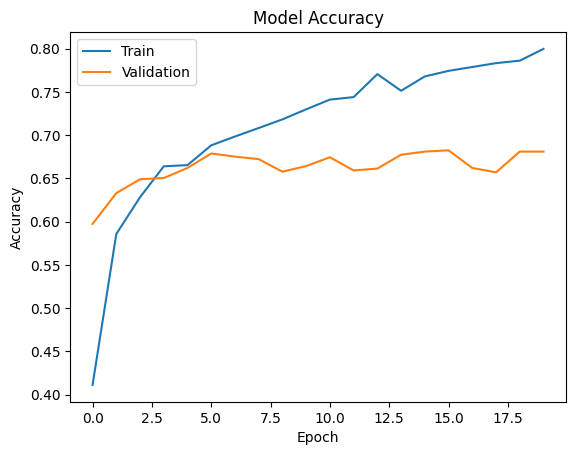

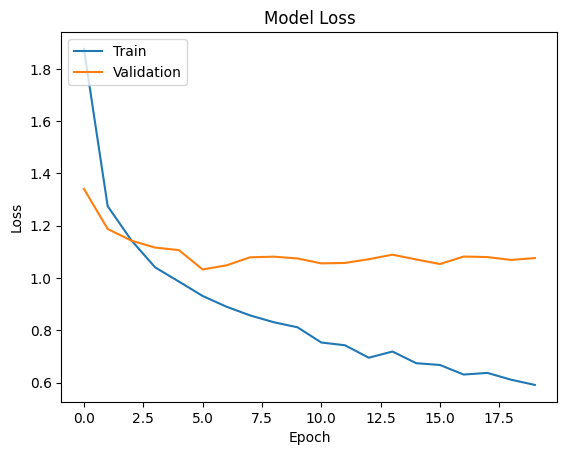

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the validation set
score = model.evaluate(validation_generator, steps=validation_generator.samples // 32)

# Print the accuracy
print(f"Validation Accuracy: {score[1] * 100:.2f}%")


43/43 [==============================] - 89s 2s/step - loss: 1.0631 - accuracy: 0.6679
Validation Accuracy: 66.79%


In [ ]:
from keras.preprocessing import image
import numpy as np

# Function to preprocess the uploaded image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize the pixel values to be between 0 and 1

# Upload an image file
uploaded = files.upload()

# Get the uploaded image file path
uploaded_file_path = list(uploaded.keys())[0]

# Preprocess the uploaded image
preprocessed_image = preprocess_image(uploaded_file_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Get the predicted breed
predicted_breed_index = np.argmax(predictions)
breed_names = sorted(train_generator.class_indices.keys())
predicted_breed = breed_names[predicted_breed_index]

# Print the prediction result
print(f"Predicted Breed: {predicted_breed}")


Saving r.jpg to r.jpg
1/1 [==============================] - 0s 57ms/step
Predicted Breed: Russian Blue


In [ ]:
# Sauvegarder le modèle
model.save("cat_breed_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
